 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [16]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [24]:
whale_returns_csv= Path('whale_returns.csv')
algo_returns_csv= Path('algo_returns.csv')
sp_tsx_history_csv= Path('sp_tsx_history.csv')

In [18]:
# Reading whale returns
whale_return_df= pd.read_csv(whale_returns_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)


In [19]:
# Count nulls
whale_return_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [20]:
# Drop nulls
whale_return_df= whale_return_df.dropna()
whale_return_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [21]:
# Reading algorithmic returns
algo_returns_df= pd.read_csv(algo_returns_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)

In [22]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [23]:
# Drop nulls
algo_returns_df= algo_returns_df.dropna()
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [25]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_df= pd.read_csv(sp_tsx_history_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)

In [26]:
# Check Data Types
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [28]:
# Fix Data Types
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.strip('$')
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace(',','')
sp_tsx_history_df
sp_tsx_history_df["Close"] = pd.to_numeric(sp_tsx_history_df["Close"])
sp_tsx_history_df

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [29]:
# Calculate Daily Returns
daily_return = sp_tsx_history_df.pct_change()
sp_tsx_history_df= daily_return
sp_tsx_history_df

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [30]:
# Drop nulls
sp_tsx_history_df= sp_tsx_history_df.dropna()
sp_tsx_history_df

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [31]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history_df = sp_tsx_history_df.rename(columns = {"Close":"S&P TSX"})
sp_tsx_history_df

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [32]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
joined_data_cols = pd.concat(
    [whale_return_df, algo_returns_df,sp_tsx_history_df], axis="columns", join="inner"
)
joined_data_cols.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

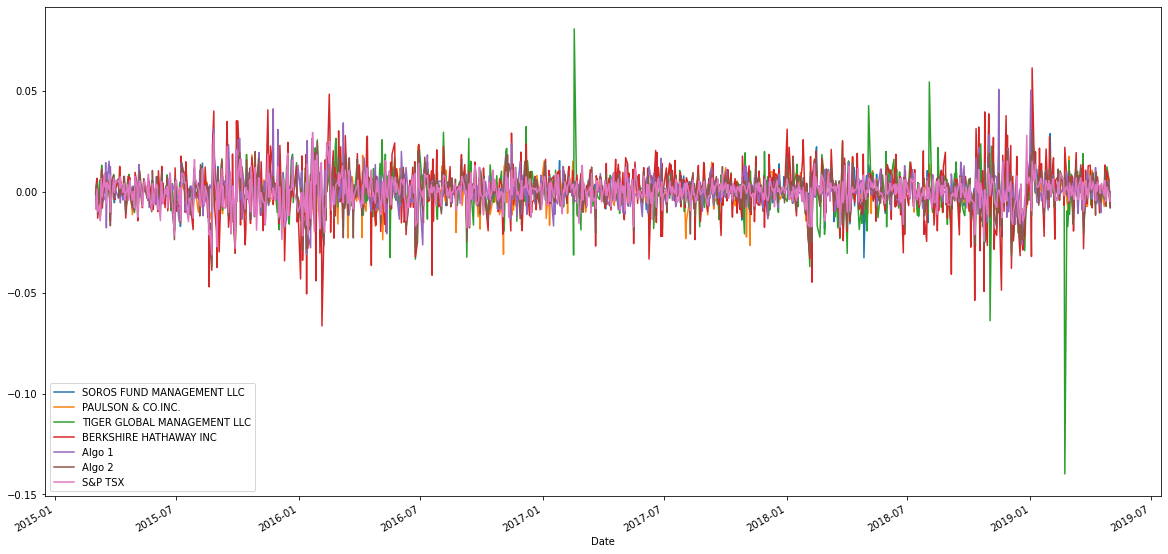

In [33]:
# Plot daily returns of all portfolios
joined_data_cols.plot(figsize=(20, 10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

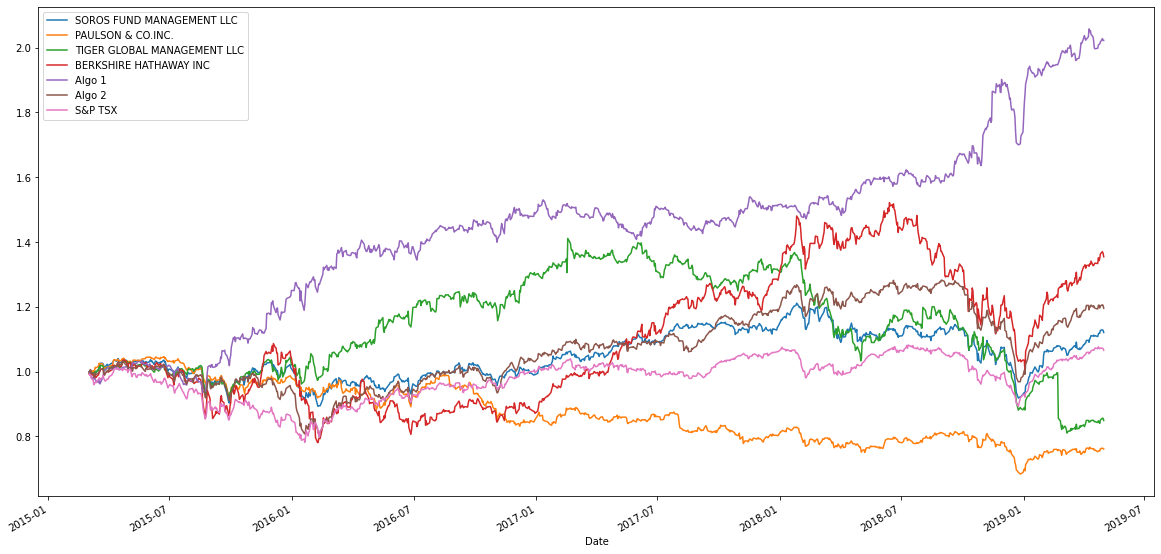

In [35]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_data_cols).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

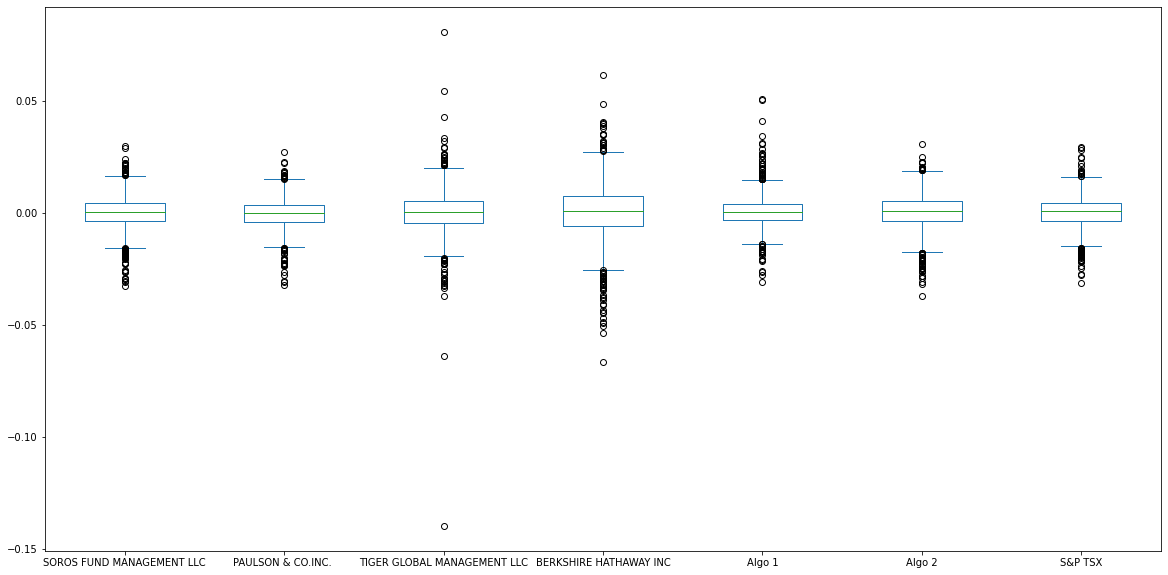

In [36]:
# Box plot to visually show risk
joined_data_cols.plot.box(figsize=(20, 10))

### Calculate Standard Deviations

In [37]:
# Calculate the daily standard deviations of all portfolios
joined_data_std= joined_data_cols.std()
joined_data_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [38]:
# Calculate  the daily standard deviation of S&P TSX 60

# Determine which portfolios are riskier than the S&P TSX 60
joined_data_std = joined_data_std.sort_values(ascending=False)
joined_data_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX                        0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

#### The portfolios above S&P TSX are risker than the S&P TSX 60, they have higher standard deviation.

### Calculate the Annualized Standard Deviation

In [39]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = joined_data_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX                        0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

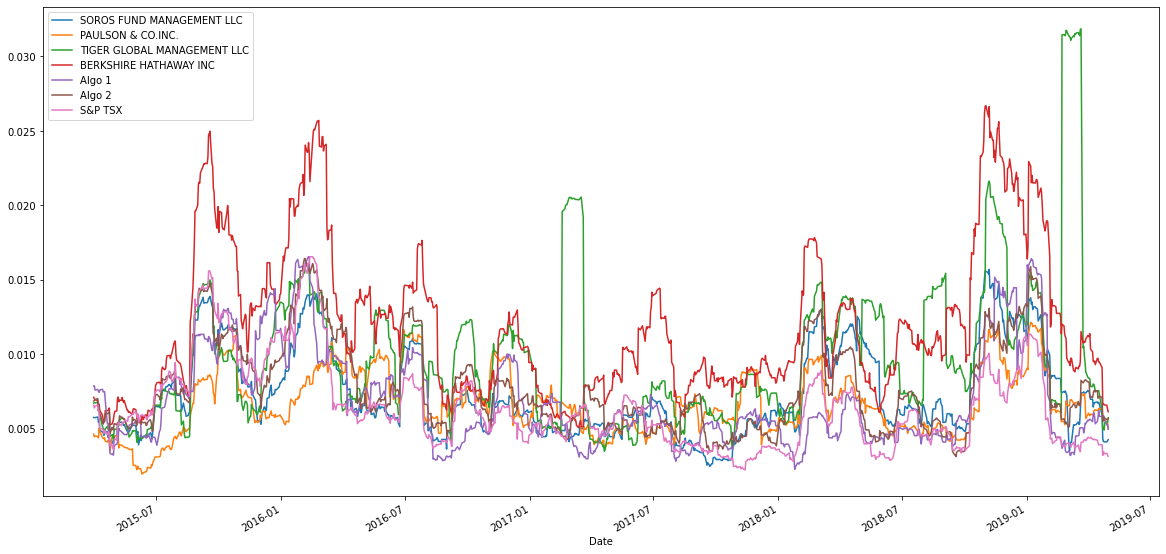

In [40]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation
joined_data_cols.rolling(window=21).std().plot(figsize=(20, 10))

### Calculate and plot the correlation

<AxesSubplot:>

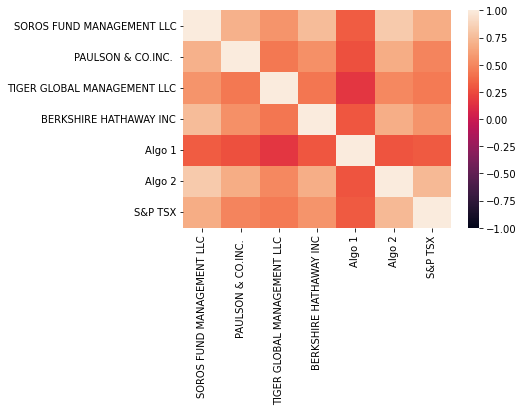

In [43]:
# Calculate the correlation
correlation = joined_data_cols.corr()
correlation
# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 30-Day Beta of SOROS'}, xlabel='Date'>

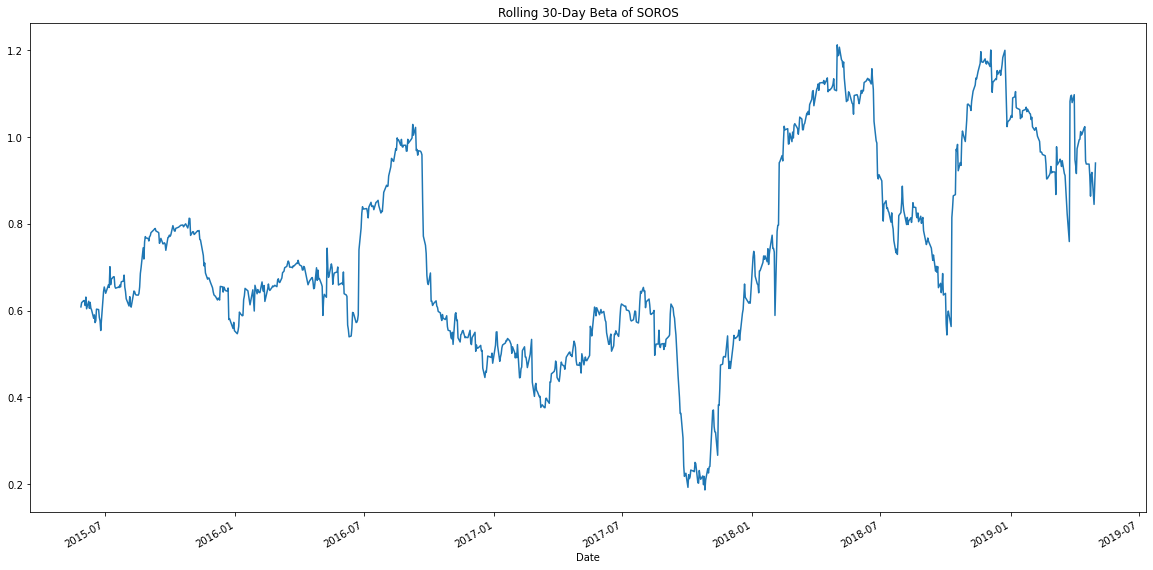

In [46]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P TSX

# Computing beta

# Plot beta
rolling_covariance = joined_data_cols['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(joined_data_cols['S&P TSX'])
rolling_covariance.tail()
rolling_variance = joined_data_cols['S&P TSX'].rolling(window=60).var()
rolling_variance.tail()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of SOROS')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Annualized Sharpe Ratios
sharpe_ratios = ((joined_data_cols.mean()) * 252) / (joined_data_cols.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

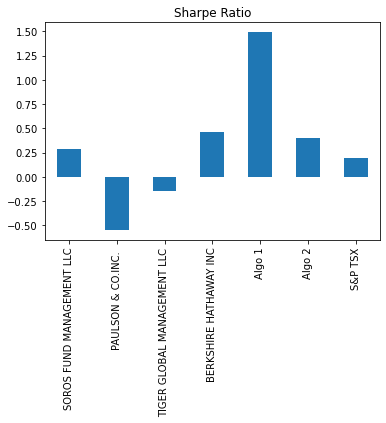

In [48]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratio') 

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!
##### Algo 1 outperformed the market(S&P TSX 60) and the whales portfolio by a large margin while Algo 2 outperformed the market(S&P TSX 60) but was outperformed by Berkshire Hathaway Inc. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [60]:
CVX_CSV= Path('CVX.csv')
INTC_CSV= Path('INTC.csv')
SU_CSV= Path('SU.csv')

In [ ]:
# Reading data from 1st stock
CVX_df= pd.read_csv(CVX_CSV, parse_dates=True, index_col="Date", infer_datetime_format=True)

In [ ]:
# Reading data from 2nd stock
INTC__df= pd.read_csv(INTC_CSV, parse_dates=True, index_col="Date", infer_datetime_format=True)

In [ ]:
# Reading data from 3rd stock
SU_df= pd.read_csv(SU_CSV, parse_dates=True, index_col="Date", infer_datetime_format=True)

In [ ]:
# Combine all stocks in a single DataFrame
# Reset Date index
# Reorganize portfolio data by having a column per symbol


In [64]:
# Calculate daily returns

# Drop NAs

# Display sample data
CVX_df= CVX_df.pct_change()
CVX_df
CVX_df = CVX_df.rename(columns = {"Close":"CVX"})
CVX_df


,CVX
Date,
2015-01-06,NaN
2015-02-06,-0.000487
2015-03-06,-0.003997
2015-04-06,-0.007634
2015-05-06,0.001973
...,...
2019-04-24,-0.030651
2019-04-25,-0.003213
2019-04-26,-0.006785


In [62]:
SU_df= SU_df.pct_change()
SU_df
SU_df = SU_df.rename(columns = {"Close":"SU"})
SU_df

,SU
Date,
2015-01-06,NaN
2015-02-06,0.007961
2015-03-06,0.001374
2015-04-06,-0.009259
2015-05-06,0.003115
...,...
2019-04-24,-0.037438
2019-04-25,0.006381
2019-04-26,-0.004529


In [65]:
INTC_df= INTC__df.pct_change()
INTC_df
INTC_df = INTC_df.rename(columns = {"Close":"INTC"})
INTC_df

,INTC
Date,
2015-01-06,NaN
2015-02-06,-0.018873
2015-03-06,-0.016231
2015-04-06,-0.012832
2015-05-06,-0.014547
...,...
2019-04-24,-0.001021
2019-04-25,-0.018903
2019-04-26,-0.089915


In [66]:
combined_data_cols = pd.concat(
    [CVX_df, SU_df,INTC_df], axis="columns", join="inner"
)
combined_data_cols.head()

,CVX,SU,INTC
Date,,,
2015-01-06,NaN,NaN,NaN
2015-02-06,-0.000487,0.007961,-0.018873
2015-03-06,-0.003997,0.001374,-0.016231
2015-04-06,-0.007634,-0.009259,-0.012832
2015-05-06,0.001973,0.003115,-0.014547


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [67]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = combined_data_cols.dot(weights)

# Display sample data
portfolio_returns.head()

Date
2015-01-06         NaN
2015-02-06   -0.003800
2015-03-06   -0.006285
2015-04-06   -0.009909
2015-05-06   -0.003153
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [68]:
# Join your returns DataFrame to the original returns DataFrame
new_df = pd.concat(
    [joined_data_cols,portfolio_returns], axis="columns", join="inner"
)
new_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,0
Date,,,,,,,,
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.006285
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,0.007965
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.006655,0.017468
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.002139,-0.012610
2015-04-06,0.005368,0.003763,0.004631,0.004920,-0.003298,0.006362,0.004927,-0.009909


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [70]:
# Calculate the annualized `std`
new_std = new_df.std()
new_std
Annualized_std = new_std * np.sqrt(252)
Annualized_std

SOROS FUND MANAGEMENT LLC      0.128580
PAULSON & CO.INC.              0.113290
TIGER GLOBAL MANAGEMENT LLC    0.180127
BERKSHIRE HATHAWAY INC         0.210448
Algo 1                         0.121441
Algo 2                         0.135080
S&P TSX                        0.113874
0                              0.198712
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

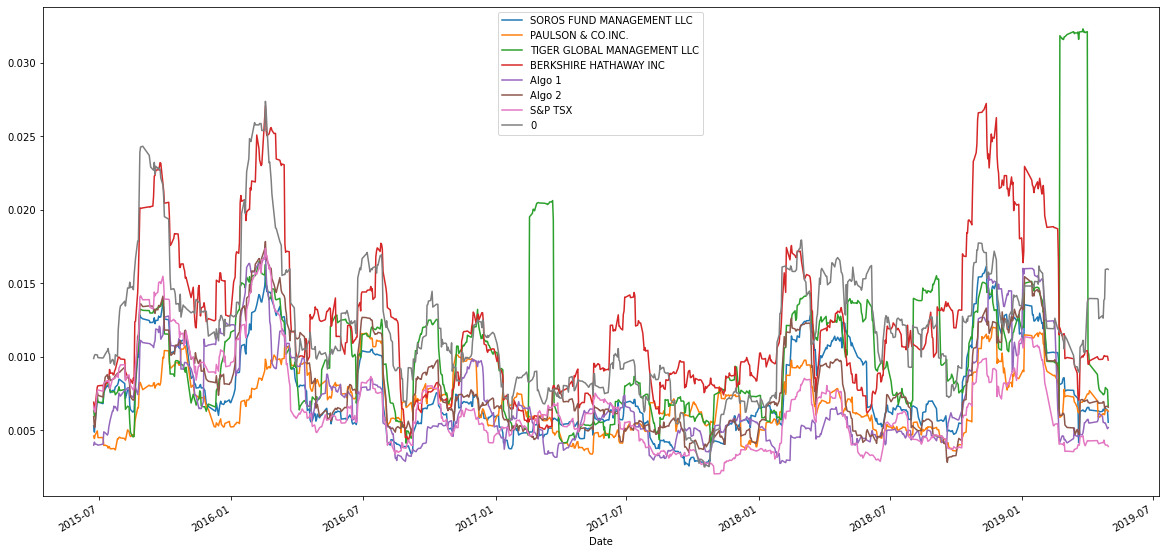

In [71]:
# Calculate rolling standard deviation

# Plot rolling standard deviation
new_df.rolling(window=21).std().plot(figsize=(20, 10))

### Calculate and plot the correlation

<AxesSubplot:>

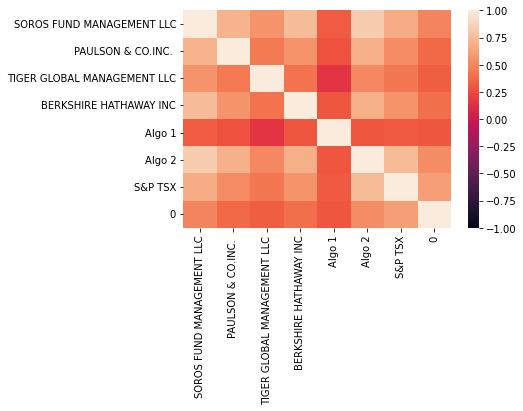

In [74]:
# Calculate and plot the correlation
correlations = new_df.corr()
correlations
sns.heatmap(correlations, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Covariance'}, xlabel='Date'>

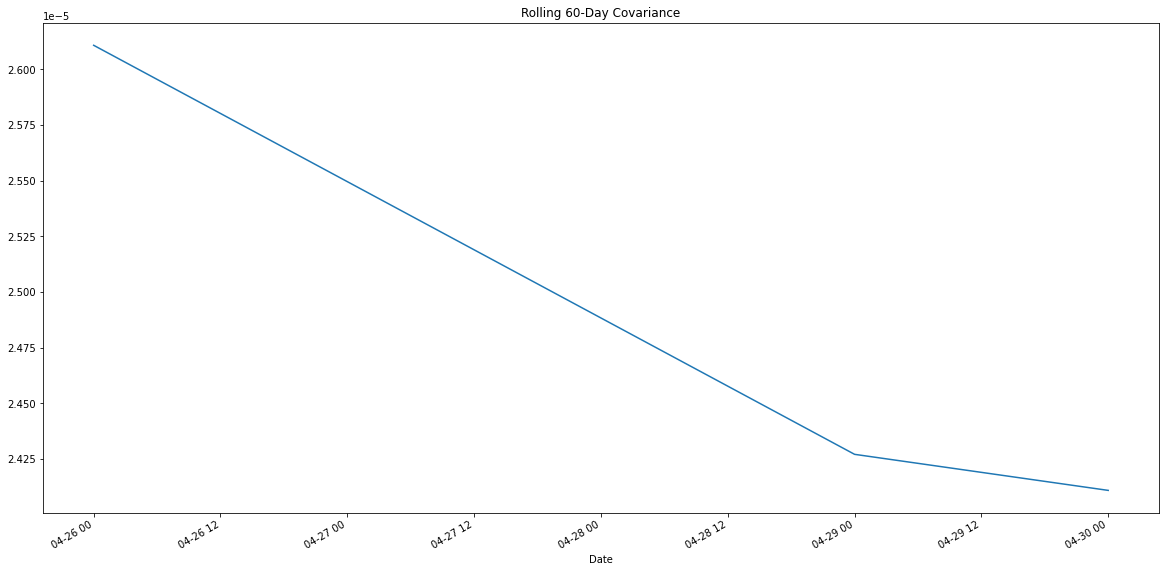

In [75]:
# Calculate and plot Beta
rolling_covariance = portfolio_returns.rolling(window=60).cov(new_df['S&P TSX'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [76]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = ((new_df.mean()) * 252) / (new_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.051972
PAULSON & CO.INC.             -0.772509
TIGER GLOBAL MANAGEMENT LLC    0.003949
BERKSHIRE HATHAWAY INC         0.108956
Algo 1                         1.276807
Algo 2                         0.184976
S&P TSX                        0.066229
0                              0.419052
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

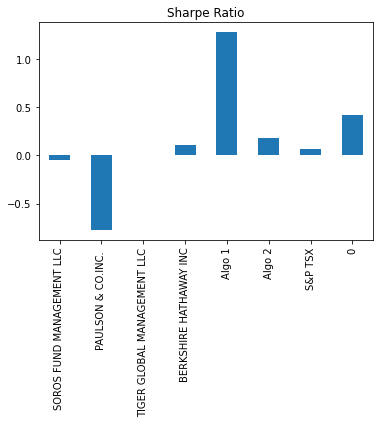

In [77]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratio')

### How does your portfolio do?

Write your answer here!
#### My portfolio outperformed the market(S&P TSX60) and the whale portfolios but failed to outperform Algo 1, yet was able to do considerable better than Algo 2